# 도입

상미분방정식: Ordinary Differential Equation
- 독립변수가 하나

편미분방정식: Partial Differential Equation
- 독립변수가 둘

상미분방정식의 분류:
- Initial Value Problem(IVP), 초기값 문제
- Boundary Value Problem(BVP), 경계값 문제

---

$$
\frac{d^2 y(t)}{dt^2} + A\frac{dy(t)}{dt}+ By(t) = G(t)\tag{1}
$$

여기서:
- $y(t)$: 종속변수
- $t$: 독립변수

미분 항이 들어있는 방정식: 미분방정식  
그중에 독립변수가 하나: 상미분방정식  
가장 미분을 많이 한 항이 2계 미분항: 2계 상미분방정식

(1) 방정식의 경우 조건이 2개면 풀린다.

$$
y(0) = y_0
$$

$$
\frac{dy_0}{dt} = v_0
$$

주어진 조건이 0인지 아닌지에 따라서도 풀이 방법이 달라진다. 미분방정식을 손으로 풀이하기에 매우 복잡하다.

계수 $A,B$들도 상수가 아니라 $t$의 함수일 수 있다. 상수일 경우의 계수들은 상계수라고 한다.

---

$$
\frac{d^2\delta(x)}{dx^2} + C \frac{d\delta(x)}{dx}+D\delta(x) = H(x) \tag{2}
$$

이것도 충분한 조건이 주어지면 손으로 풀 수도 있다.

__Initial value problem(IVP):__
1. Euler Method, 1계 오차정확도
2. Runge-Kutta Method, 2계 이상의 오차정확도 가능

__Boundary value problem(BVP):__
1. Matrix Method: 결과로 삼대각행렬이 나와 TDMA 사용해 풀이
2. Shooting Method: 오일러 방법과 룽게 쿠타 방법의 응용

---

# 초기치 문제의 수치해법
p.248

## 오일러 방법
_Euler Method_

### 1계 상미분방정식

_First-order ODE_

$$
\begin{cases}
\frac{dy(t)}{dt} = f(y,t)\\
y(0)=y_0,\ \text{if } t=0
\end{cases}
$$

유한차분법으로 미분항을 변형할 수 있다.

$$
\frac{y_{j+1} - y_{j}}{\Delta t} = f(y_j, t_j),\quad \Delta t = t_{j+1} - t_{j}
$$

$$
\text{where }y_j = y(t_j)
$$

여기서 한 번 더 변형을 하면:

$$
y_{j+1} = y_j + \Delta t f(y_j, t_j)
$$

이와 같은 반복 업데이트 식이 되어 다음 스텝의 값을 계속 구할 수 있다. 이러한 방법을 __오일러 방법(Euler Method)__ 이라고 한다.

오일러 방법의 오차는 $\sigma(\Delta t)$이다. 실제 미분을 한 게 아니라 차분을 하였기 때문이다. 이러한 오차 해석도 중요하다.

---

### 1계 ODE 예제

#### 교재 249p 예제

$III-I-I$ 예제

$$
\frac{dy(t)}{dt}+2y = 0,\quad y(0)=1,\ 0\le t \le 1
$$

해석해: $y(t) = e^{-2t}$  
$t=1$일 때 $y(1)=0.135335$

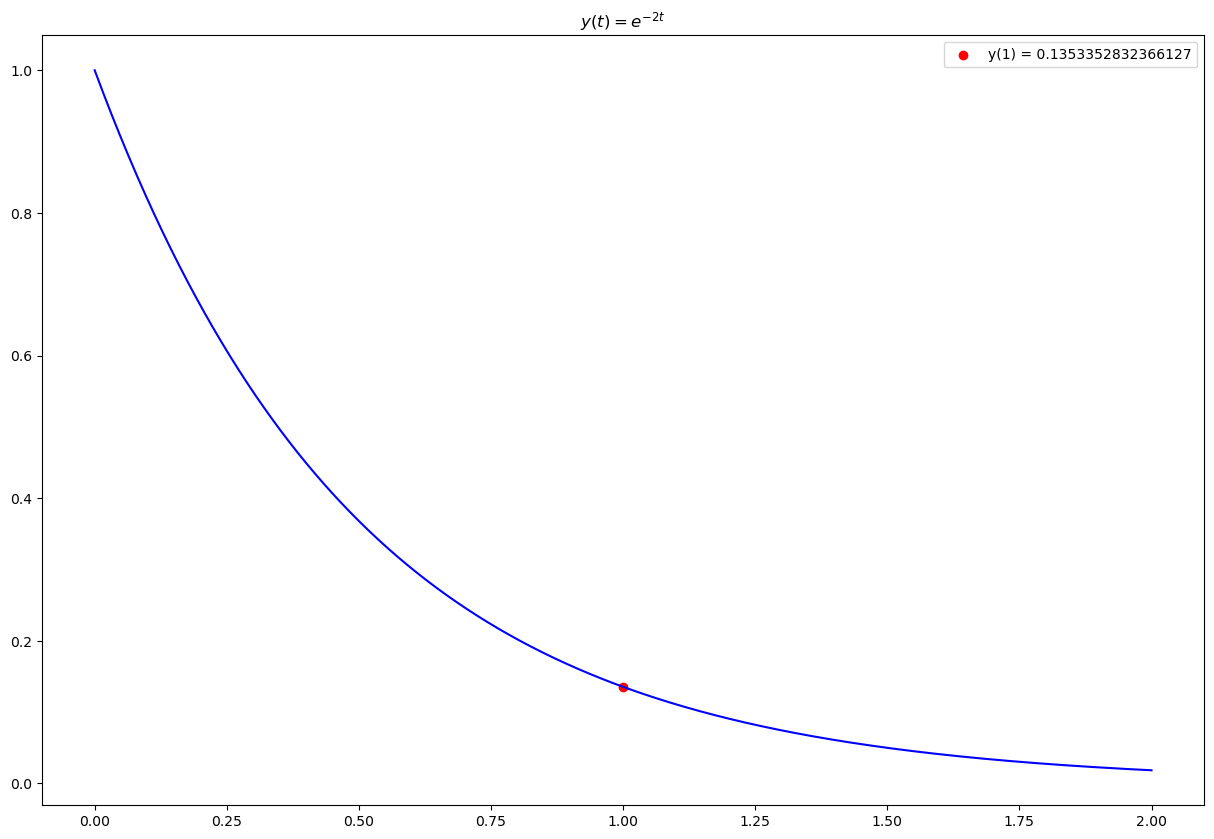

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def y(t):
    return np.exp(-2*t)

t = np.linspace(0, 2, 1000)

plt.figure(figsize=(15,10))
plt.plot(t, y(t), c='b')
plt.scatter(1, y(1), c='r', label=f'y(1) = {y(1)}')
plt.legend()
plt.title(r'$y(t) = e^{-2t}$')
plt.show()

$$
\frac{dy(t)}{dt} = -2y_j
$$

$$
y_{j+1} = y_j + (-\Delta t\cdot 2y_j)
$$
$$
\to y_1 = y_0 - \Delta t \cdot (2y_0) \approx 0.6, \quad\because\ y_0 = 1
$$

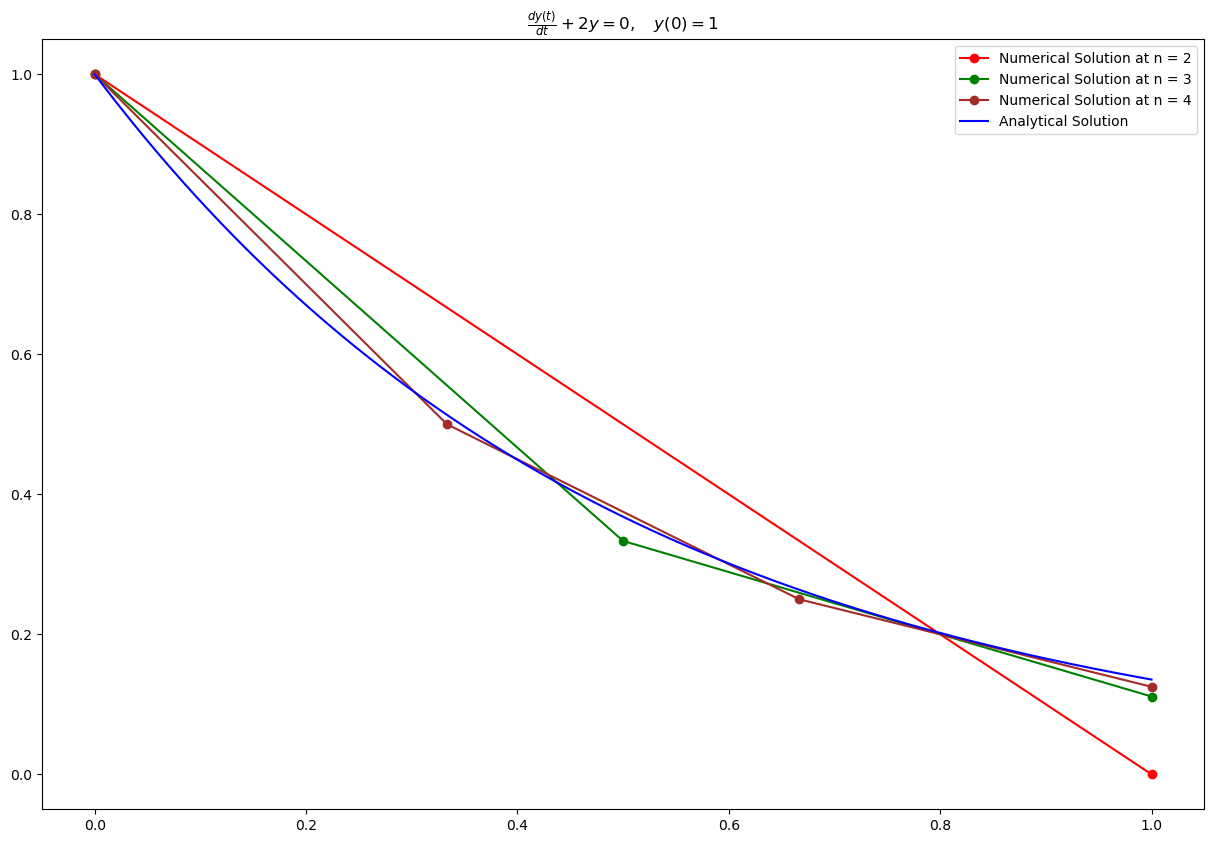

Target value of y(t) = 0.125


In [2]:
def EulerMethod(init_y:float, n:int) -> list:
    '''
    init_y: Initial Value of y\\
    n: Number of points
    '''
    yt = [init_y]
    for j in range(n-1):
        yt.append(yt[j] + -(1/n) * 2 * yt[j])
    return yt

plt.figure(figsize=(15,10))
col = ['r','g','brown']
for n in range(2, 5):
    yt = EulerMethod(init_y=1, n=n)
    t = np.linspace(0, 1, n)
    plt.plot(t, yt, marker='o', c=col[n-2], label=f'Numerical Solution at n = {n}')
plt.plot(np.linspace(0,1,1000), 
         y(np.linspace(0,1,1000)), 
         c='b', label='Analytical Solution')
plt.title(r'$\frac{dy(t)}{dt} + 2y = 0,\quad y(0)=1$')
plt.legend()
plt.show()
print(f'Target value of y(t) = {yt[-1]}')

#### $III-I-2$ 예제

$$
\frac{dy}{dt} + y = t,\quad y(0) =1 
$$

$$
\frac{dy}{dt} = t-y = f(y,t)
$$

$$
y_{exact} = (t-1)+ 2e^{-t}
$$

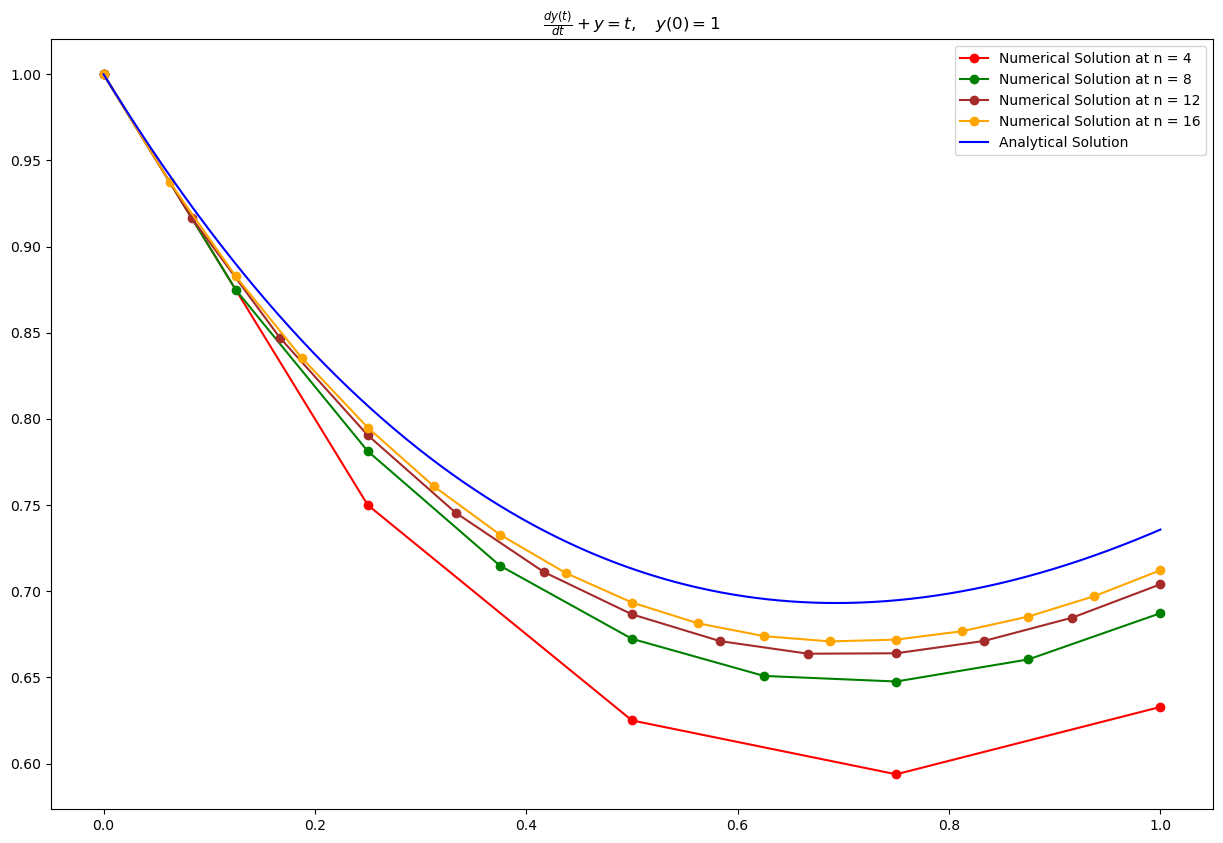

Target value of y(t) = 0.7121482609035856,
True value of y(t) = 0.7357588823428847


In [3]:
from ODE import ODESolver
def y(t):
    return (t-1) + 2*np.exp(-t)

def approx(yt, t):
    return t - yt

plt.figure(figsize=(15,10))
col = ['r','g','brown', 'orange', 'skyblue']
for n in range(4, 17, 4):
    t, yt = ODESolver().EulerMethod(func=approx, y0=1, t0=0, t_end=1, h=1/n)
    plt.plot(t, yt, marker='o', c=col[n//4 - 1], label=f'Numerical Solution at n = {n}')

plt.plot(np.linspace(0,1,1000), 
         y(np.linspace(0,1,1000)), 
         c='b', label='Analytical Solution')
plt.title(r'$\frac{dy(t)}{dt} + y = t,\quad y(0)=1$')
plt.legend()
plt.show()
print(f'Target value of y(t) = {yt[-1]},\nTrue value of y(t) = {y(1)}')

---

### 2계 상미분방정식

_Second-order ODE_

교재 1.2.2절

$$
\frac{d^2 y}{dt^2} + A \frac{dy}{dt} + By = G(t)
$$

우리의 관심은 이 방정식을 통하여 종속변수 $y(t)$를 알아내는 것이다.  
여기서의 독립변수는 t이다.

해석적으로 2계 미분방정식의 해를 구하려면 조건이 2개가 필요하다. 

$$
y(0) \equiv y_0,\ \frac{dy}{dt} \equiv u_0
$$

1계 미분항을 치환:

$$
\frac{dy}{dt} = z \to \frac{d^2 y }{dt^2} = \frac{dz}{dt}
$$

$$
\frac{dy(0)}{dt} = z(0) = u_0
$$

원래 식에 대입:

$$
\frac{dz}{dt} + Az + By = G(t)
$$

$$
\to \frac{dz}{dt} = - Az - By + G(t)
$$

$$
\frac{dy}{dt} = z = f_1,\quad y(0) \equiv y_0
$$

$$
\frac{dz}{dt} = -Az - By + G(t)=f_2,\quad z(0) \equiv u_0
$$

이와 같이 결국 두 개의 1계 상미분방정식이 된다.  
위 식을 유한차분하면:

$$
\frac{y_{j+1} - y_j}{\Delta t} = z_j = f_1(y_j,z_j,t_j)
$$

$$
\frac{z_{j+1} - z_j}{\Delta t} = -Az_j - By_j + G(t_j)
$$

$$
y_{j+1} = y_j + \Delta t \cdot f_1(y_j,z_j,t_j) = y_j + \Delta t \cdot z_j
$$

$$
z_{j+1} = z_j + \Delta t \cdot f_2(y_j,z_j,t_j) = z_j + \Delta t \cdot (-Az_j + -B y_j + G(t_j))
$$

---

### 2계 ODE 예제

#### 교재 예제 $III-I-3$

$$
\frac{d^2 y}{dt^2} + \frac{dy}{dt} -2y =0
$$

조건:
$$
y(0) = 1, \ \frac{dy(0)}{dt}=0
$$

치환:

$$
\frac{dy}{dt} = z = f_1,\quad  y(0)=1
$$

$$
\frac{dz}{dt} = -z + 2y = f_2,\quad z(0) = 0
$$

위 두 식과 각각의 조건식(초기치)를 이용해 수치해석이 가능하다.

$$
y_{j+1} = y_j + \Delta t \cdot f_1(y_j,z_j,t_j) = y_j + \Delta  t \cdot z_j
$$

$$
z_{j+1} = z_j + \Delta t \cdot f_2 = z_j + \Delta t \cdot(-z_j + 2y_j)
$$

해석적 해:
$$
y_{\text{exact}} = \frac{2}{3}e^t + \frac{1}{3}e^{-2t}, \quad(0\le t \le 2)
$$

In [4]:
from math import exp

2/3 * exp(2) + 1/3 * exp(-2 * 2)

4.932142612250011

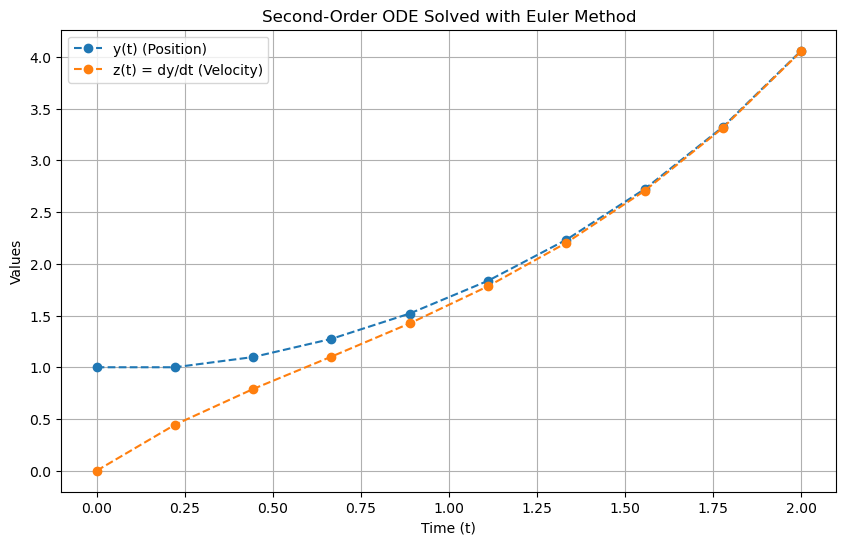

In [5]:
import matplotlib.pyplot as plt
import numpy as np

t_vals, y_vals, z_vals = ODESolver().EulerMethod_2nd(dfy=lambda y, z, t:z,
                                             dfz=lambda y, z, t:-z + 2*y,
                                             y0=1, z0=0, t0=0, t_end=2, n=10)

plt.figure(figsize=(10, 6))
plt.plot(t_vals, y_vals, label="y(t) (Position)", marker='o', linestyle='--')
plt.plot(t_vals, z_vals, label="z(t) = dy/dt (Velocity)", marker='o', linestyle='--')
plt.title("Second-Order ODE Solved with Euler Method")
plt.xlabel("Time (t)")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

#### 교재 예제 $III-I-4$

$$
\frac{d^2 y(t)}{dt^2} - \frac{dy}{dt} - 6y = 6t
$$

조건:

$$
y(0)=0,\ \frac{dy}{dt}(0) = 0
$$

Time values: [0.         0.02020202 0.04040404 0.06060606 0.08080808 0.1010101
 0.12121212 0.14141414 0.16161616 0.18181818 0.2020202  0.22222222
 0.24242424 0.26262626 0.28282828 0.3030303  0.32323232 0.34343434
 0.36363636 0.38383838 0.4040404  0.42424242 0.44444444 0.46464646
 0.48484848 0.50505051 0.52525253 0.54545455 0.56565657 0.58585859
 0.60606061 0.62626263 0.64646465 0.66666667 0.68686869 0.70707071
 0.72727273 0.74747475 0.76767677 0.78787879 0.80808081 0.82828283
 0.84848485 0.86868687 0.88888889 0.90909091 0.92929293 0.94949495
 0.96969697 0.98989899 1.01010101 1.03030303 1.05050505 1.07070707
 1.09090909 1.11111111 1.13131313 1.15151515 1.17171717 1.19191919
 1.21212121 1.23232323 1.25252525 1.27272727 1.29292929 1.31313131
 1.33333333 1.35353535 1.37373737 1.39393939 1.41414141 1.43434343
 1.45454545 1.47474747 1.49494949 1.51515152 1.53535354 1.55555556
 1.57575758 1.5959596  1.61616162 1.63636364 1.65656566 1.67676768
 1.6969697  1.71717172 1.73737374 1.75757576 1.777

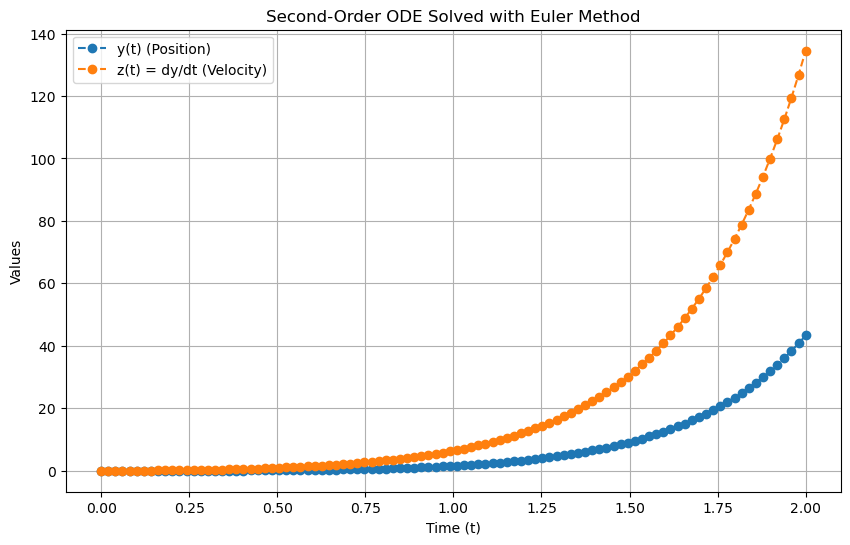

In [6]:
# 테스트 함수: dz/dt = z + 6*y + 6*t, dy/dt = z
dfz = lambda y, z, t: z + 6 * y + 6 * t
dfy = lambda y, z, t: z

# 초기 조건
t0, t_end = 0, 2
y0, z0 = 0, 0

# ODESolver 클래스의 EulerMethod_2nd 메서드 호출
t_vals, y_vals, z_vals = ODESolver.EulerMethod_2nd(dfz, dfy, y0, z0, t0, t_end, n=100)

# 결과 출력
print("Time values:", t_vals)
print("y(t) values (Position):", y_vals)
print("z(t) values (Velocity):", z_vals)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(t_vals, y_vals, label="y(t) (Position)", marker='o', linestyle='--')
plt.plot(t_vals, z_vals, label="z(t) = dy/dt (Velocity)", marker='o', linestyle='--')
plt.title("Second-Order ODE Solved with Euler Method")
plt.xlabel("Time (t)")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

---

### n계 상미분방정식

$$
\frac{d^3y_1}{dt^3} + A\frac{d^2 y_1}{dt^2} + B \frac{dy_1}{dt} + cy_1 = G(t)
$$

조건:

$$
y_1(0) = y_{10},\ \frac{dy_1(0)}{dt} = y_{20},\ \frac{d^2 y_1(0)}{dt^2} = y_{30}
$$

$$
\frac{dy_1}{dt} = y_2
$$

$$
\frac{d^2 y_1}{dt^2} = \frac{dy_2}{dt} = y_3
$$

$$
\frac{d^3 y_1}{dt^3} = \frac{dy_3}{dt} = -Ay_3 - By_2 - cy_1 + G(t)
$$

업데이트 식:

$$
\frac{dy_1}{dt}=y_2 = f_1,\ y_1(0)=y_{10}
$$
$$
\frac{dy_2}{dt} = y_3 = f_2,\ y_2(0)=y_{20}
$$
$$
\frac{dy_3}{dt} = -Ay_3 - By_2 - Cy_1 + G(t) = f_3,\ y_3(0) = y_{30}
$$

---

### 오일러 방법의 수치 오차

_Error Analysis of Euler Method_

ODE IVP의 기본 형태:
$$
\begin{cases}
\frac{dy}{dt} = f(y, t)\\ y(0) = y_0
\end{cases}\tag{0}
$$

유한차분:
$$
\text{Finite Difference: }\\
y_{j+1} = y_j + \Delta t \cdot f(y_j, t_j)\tag{1}
$$

$j$ 지점에서의 값이 정확히 주어졌을 경우(초기치):
$$
\tilde{y}_{j+1} = Y_j + \Delta t \cdot f(Y_j, t_j)\tag{2}
$$

__테일러 급수 전개__

$$
Y_{j+1} = Y_j + \Delta t \cdot \frac{dY}{dt}\bigg|_{t_j} + \frac{(\Delta t)^2}{2!} \frac{d^2 Y}{dt^2}\bigg|_{t_j} + \cdots \tag{3}
$$

이에 원래의 미분식 $(0)$을 대입하면:

$$
\begin{cases}
\frac{dY}{dt}\bigg|_{t_j} = f(Y_j, t_j)\\
\frac{d^2 Y}{dt^2}\bigg|_{t_j} = f'(Y_j, t_j)\\
\frac{d^3 Y}{dt^3}\bigg|_{t_j} = f''(Y_j, t_j)\\
\quad\quad\vdots
\end{cases}\tag{4}
$$

이제 $(4)$의 결론을 $(3)$에 대입하면:

$$
Y_{j+1} = Y_j + \Delta t \cdot f(Y_j, t_j ) + \frac{(\Delta t)^2}{2!}f'(Y_j, t_j)+ \cdots\tag{5}
$$

업데이트 식 $(2)$와 $(5)$의 차이:

$$
\tilde{y}_{j+1} - Y_{j+1}  = - \frac{(\Delta t)^2}{2} f'(Y_j, t_j) - \frac{(\Delta t)^3}{3!} f''(Y_j, t_j)- \cdots
$$


$$
= - \frac{(\Delta t)^2}{2}f'(Y_j, t_j) + \sigma(\Delta t)^3 = E_{j+1}\tag{6} \approx \sigma(\Delta t)^2
$$

이제 식 $(1)-(5)$를 하면:

$$
y_{j+1} - Y_{j+1} = y_j - Y_j + \Delta t [f(y_j, t_j) - f(Y_j, t_j)] - \frac{(\Delta t)^2}{2!} f'(Y_j, t_j) - \frac{(\Delta t)^3}{3!} f''(Y_j, t_j) -\cdots
$$

$$
= E_{j+1} \approx \sigma(\Delta t)^2 \tag{7}
$$

위 $(7)$식에서:
$$
y_{j+1} - Y_{j+1} = \epsilon_{j+1},\ y_j - Y_j = \epsilon_j
$$

이를 대입해 $(7)$을 다시 계산하면:

$$
\epsilon_{j+1} = \epsilon_j + \Delta t \cdot [f(y_j, t_j ) - f(Y_j , t_j)] + E_{j+1}\tag{8}
$$

$$
\frac{f(y_j, t_j) - f(Y_j, y_j)}{y_j - Y_j} \approx \frac{\partial f}{\partial y}(\delta_j, t_j) = P_j
$$

이제 이걸 $(8)$식에 다시 대입:

$$
\epsilon_{j+1} = \epsilon_j + \Delta t \cdot P_j(y_j - Y_j) + E_{j+1} = \epsilon_j (1 + \Delta t \cdot P_j) + E_{j+1}\tag{9}
$$

최종 절단오차 업데이트 식:

$$
\epsilon_{j+1} = \epsilon_j (1+\Delta t \cdot P) + E \tag{10}
$$

---

$j=0$ 일 때의 예시:

$$
\epsilon_1 = \epsilon_0 (1+ \Delta t \cdot P) + E= E,\ \epsilon_0 = y_0 - Y_0 = 0
$$

$j=1$일 때:

$$
\epsilon_2 = \epsilon_1 (1 + \Delta t \cdot P) + E = E(1+\Delta t \cdot P) + E = 2E + \sigma(\Delta t)
$$

$j=2$ 일 때:

$$
\epsilon_3 = \epsilon_2 (1 + \Delta t \cdot P) + E = E(1+\Delta t \cdot P) + E = 3E + (1+\Delta t \cdot P) + \sigma(\Delta t)^2=3E + \sigma(\Delta t)^2
$$

$$
\because\ (1>> \Delta t)
$$

$j=j$일 때로 일반화:

$$
\epsilon_{j+1} = E(j+1) + \sigma(\Delta t)^j\tag{11}
$$

$$
E \approx \sigma(\Delta t)^2, t_{j+1} =(j+1)\Delta t
$$

$$
\epsilon_{j+1} = \left(\frac{t_{j+1}}{\Delta t}\right) \sigma(\Delta t)^2 + \sigma(\Delta t)^j 
$$

$$
= t_{j+1} \cdot \sigma(\Delta t)^2 + \sigma (\Delta t)^j \approx \sigma(\Delta t)
$$

---

## Runge-Kutta Method

오일러 방법 복기

$$
\frac{dy}{dt} = f(y,t), \ y(0)=y_0
$$

업데이트 식:
$$
y_{j+1} = y_j + \Delta t \cdot f(y_j, t_j) + \sigma(\Delta t)\text{:   Euler Method}
$$

룽게 쿠타는 $\sigma(\Delta t)^2$ 이상의 정확도를 가질 수 있다. 교재 1.2.5.1에 2차 정확도 Runge-Kutta Method가 나와 있다.

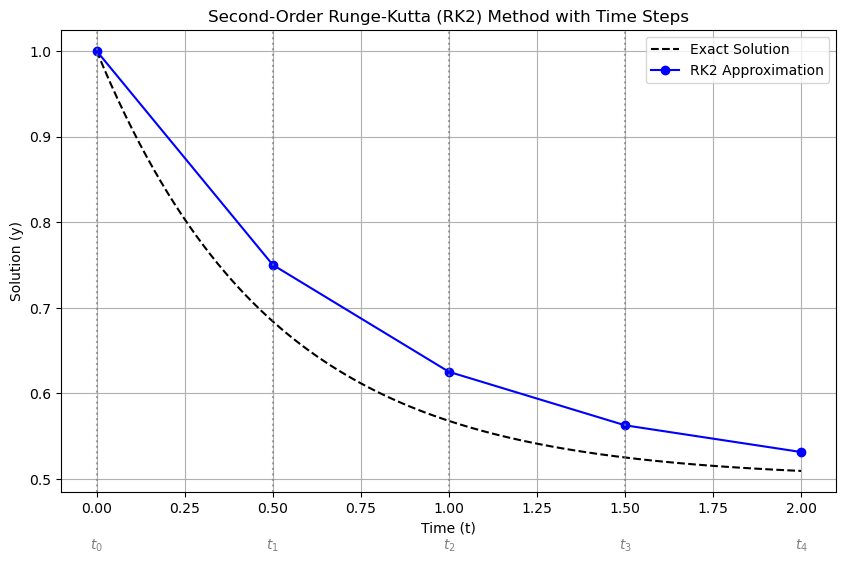

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ODE import ODESolver

# Define the ODE: dy/dt = -2y + 1
def f(t, y):
    return -2 * y + 1

# Exact solution for the ODE
def exact_solution(t):
    return 0.5 + 0.5 * np.exp(-2 * t)

# Parameters
y0 = 1  # Initial value
t0 = 0  # Start time
t_end = 2  # End time
n = 5  # Points

# Solve using RK2
t_values, y_rk2 = ODESolver().RK2(f, y0, t0, t_end, n)

# Exact solution
t_exact = np.linspace(t0, t_end, 100)
y_exact = exact_solution(t_exact)
# Visualization with vertical lines and annotations
plt.figure(figsize=(10, 6))

# Plot exact solution
plt.plot(t_exact, y_exact, label="Exact Solution", color="black", linestyle="--")

# Plot RK2 approximation
plt.plot(t_values, y_rk2, label="RK2 Approximation", color="blue", marker="o")

# Add vertical dashed lines and annotations for each time step
for i, t in enumerate(t_values[:-1]):
    plt.axvline(x=t, color="gray", linestyle="dotted", alpha=0.7)
    plt.text(t, min(y_rk2) - 0.1, f"$t_{i}$", ha="center", va="top", fontsize=10, color="gray")
# Annotate the final time step
plt.text(t_values[-1], min(y_rk2) - 0.1, f"$t_{len(t_values) - 1}$", ha="center", va="top", fontsize=10, color="gray")

# Add title and labels
plt.title("Second-Order Runge-Kutta (RK2) Method with Time Steps")
plt.xlabel("Time (t)")
plt.ylabel("Solution (y)")
plt.legend()
plt.grid()

plt.show()

일단 오일러 방법에서 출발한다.

$$
y_{j+1} = y_j + \Delta t \cdot f(y_j, t_j)\tag{1}
$$

여기서 스텝 사이즈를 반으로 쪼개서 다시 오일러 방법으로 $y_{j+1}$을 근사한다.
$$
t_{j+\frac{1}{2}} = t_j + \frac{1}{2} \Delta t
$$

$$
y_{j+1} = y_{j} + \Delta t \cdot f\left(y_{j+\frac{1}{2}}, t_{j+\frac{1}{2}}\right)\tag{2}
$$

이 함수값을 구하기 위해선 $y_{j+\frac{1}{2}}$을 구해서 넣어야 한다.

그걸 위해 다시 오일러 방법을 사용한다.

$$
y_{j+\frac{1}{2}} = y_j + \frac{\Delta t}{2} \cdot f(y_j, t_j)
$$

중간 스텝 값도 사용함으로써 기울기를 더 정확히 계산하여 더 정확한 목표치에 도달할 수 있게 하는 것이다. 이것이 2차 정확도 룽게-쿠타 방법이다.

### 예제

#### 교재 예제 $III-I-6$

$$
\frac{dy}{dt} + 2y = 0,\ y(0)= 1,\ (0\le t\le 1)\tag{0}
$$

$$
y_{\text{exact}}(t)= e^{-2t},y_{\text{exact}}(1)= 0.13535...
$$

(0) 식에서:

$$
\frac{dy}{dt}= -2y = f(y, t),\ y(0)=1\tag{1}
$$

유한차분(오일러 방법):

$$
\begin{cases}
y_{j+1} = y_j + \Delta t \cdot f(y_j, t_j)
\\
y_{j+\frac{1}{2}} = y_j + \frac{\Delta t}{2} \cdot f(y_j, t_j)
\end{cases}\tag{2}
$$

책의 설정: $\Delta t \in \{0.2, 0.1\}$

$y(0)=1$이므로, $\frac{dy}{dt}=-2$이다.

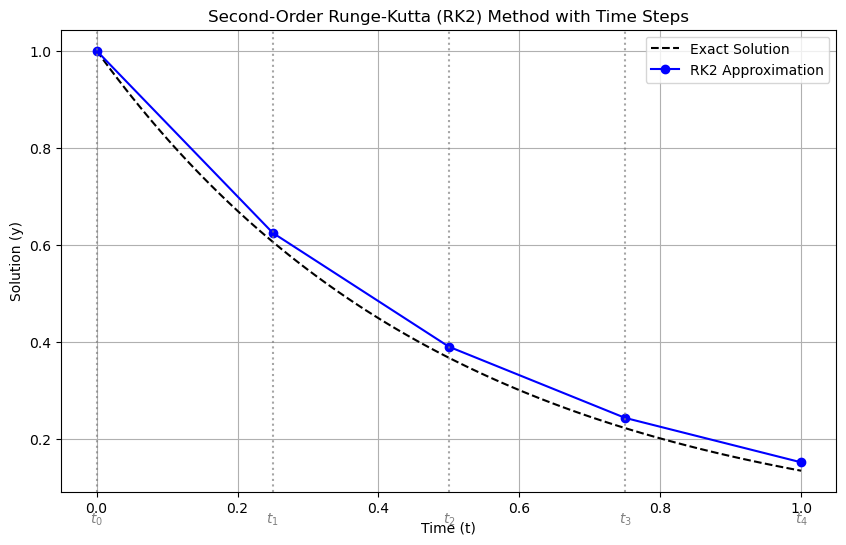

In [8]:
def exact_solution(t):
    return np.exp(-2 * t)

t_values, y_rk2 = ODESolver().RK2(func=lambda t, y: -2 * y, y0=1, t0=0, t_end=1, n=5)

# Exact solution
t_exact = np.linspace(0, 1, 100)
y_exact = exact_solution(t_exact)
# Visualization with vertical lines and annotations
plt.figure(figsize=(10, 6))

# Plot exact solution
plt.plot(t_exact, y_exact, label="Exact Solution", color="black", linestyle="--")

# Plot RK2 approximation
plt.plot(t_values, y_rk2, label="RK2 Approximation", color="blue", marker="o")

# Add vertical dashed lines and annotations for each time step
for i, t in enumerate(t_values[:-1]):
    plt.axvline(x=t, color="gray", linestyle="dotted", alpha=0.7)
    plt.text(t, min(y_rk2) - 0.1, f"$t_{i}$", ha="center", va="top", fontsize=10, color="gray")
# Annotate the final time step
plt.text(t_values[-1], min(y_rk2) - 0.1, f"$t_{len(t_values) - 1}$", ha="center", va="top", fontsize=10, color="gray")

# Add title and labels
plt.title("Second-Order Runge-Kutta (RK2) Method with Time Steps")
plt.xlabel("Time (t)")
plt.ylabel("Solution (y)")
plt.legend()
plt.grid()

plt.show()

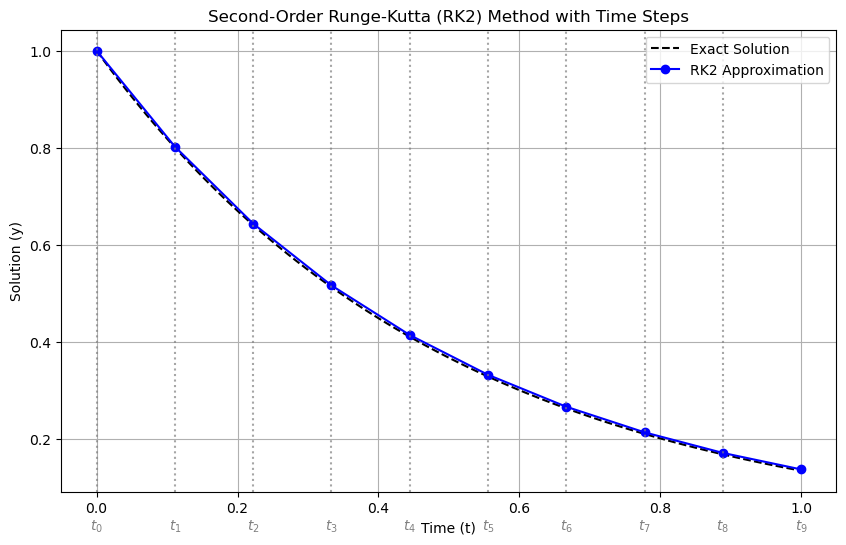

In [9]:
t_values, y_rk2 = ODESolver().RK2(func=lambda t, y: -2 * y, y0=1, t0=0, t_end=1, n=10)

# Exact solution
t_exact = np.linspace(0, 1, 100)
y_exact = exact_solution(t_exact)
# Visualization with vertical lines and annotations
plt.figure(figsize=(10, 6))

# Plot exact solution
plt.plot(t_exact, y_exact, label="Exact Solution", color="black", linestyle="--")

# Plot RK2 approximation
plt.plot(t_values, y_rk2, label="RK2 Approximation", color="blue", marker="o")

# Add vertical dashed lines and annotations for each time step
for i, t in enumerate(t_values[:-1]):
    plt.axvline(x=t, color="gray", linestyle="dotted", alpha=0.7)
    plt.text(t, min(y_rk2) - 0.1, f"$t_{i}$", ha="center", va="top", fontsize=10, color="gray")
# Annotate the final time step
plt.text(t_values[-1], min(y_rk2) - 0.1, f"$t_{len(t_values) - 1}$", ha="center", va="top", fontsize=10, color="gray")

# Add title and labels
plt.title("Second-Order Runge-Kutta (RK2) Method with Time Steps")
plt.xlabel("Time (t)")
plt.ylabel("Solution (y)")
plt.legend()
plt.grid()

plt.show()

#### 교재 예제 $III-I-7$

$$
\frac{d^2 y}{dt^2} + \frac{dy}{dt} - 3y = 0,\ y(0)=1, \frac{dy(0)}{dt}=0,\ (0 \le t \le 2)\tag{0}
$$

$$
y_{exact}(t)=\frac{3}{4}e^{t} + \frac{1}{4}e^{-3t}, y_{exact}(2)=5.542412...
$$

$$
\frac{dy}{dt}=z=f_1(y, z, t),\ y(0)=1, \frac{dy(0)}{dt}=0 \tag{1}
$$

$$
\frac{d^2y}{dt^2} = \frac{dz}{dt} = -2z + 3y = f_2(y, z , t),\ z(0)=0 \tag{2}
$$

유한차분:

$$
y_{j+1} = y_j + \Delta t \cdot f_1(y_{j + 1/2}, z_{j+1/2}, t_{j+1/2}) = y_j + \Delta t \cdot (z_{j+1/2})
$$

$$
z_{j+1} = z_j + \Delta t\cdot f_2(y_{j+1/2}, z_{j+1/2}, t_{j+1/2}) = z_j + \Delta t \cdot (-2z_{j+1/2} + 3y_{j+1/2})
$$

$$
z_{j+1/2} = z_j + \Delta t /2 \cdot f_2(y_j,z_j, t_j) = z_j + (\Delta t /2) \cdot(-2z_j + 3y_j)
$$

$$
y_{j+1/2} = y_j + \Delta t/2 \cdot f_1(y_j, z_j, t_j) = y_j + (\Delta t /2) (z_{j})
$$

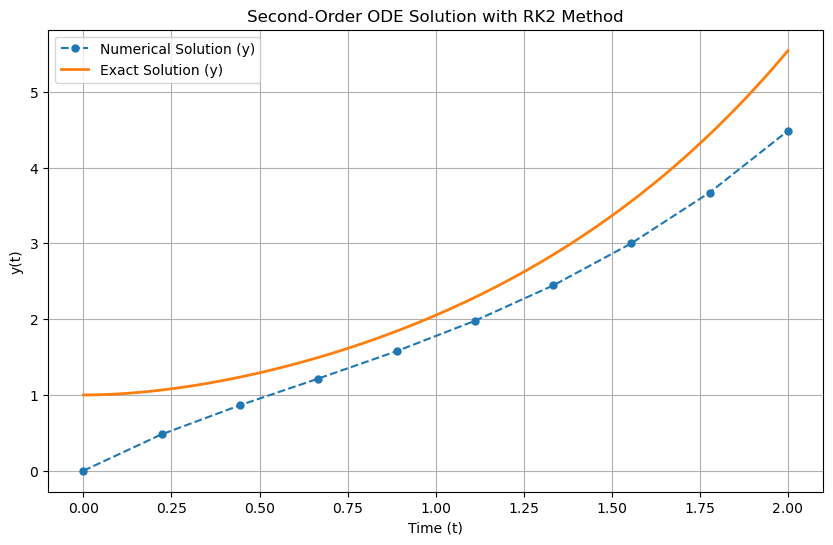

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ODE import ODESolver

# 테스트: dz/dt = -2z + 3y, dy/dt = z
dfz = lambda y, z, t: -2 * z + 3 * y
dfy = lambda y, z, t: z

# 초기 조건
y0, z0 = 1, 0
t0, t_end = 0, 2
n = 10  # 스텝 수

# RK2 메서드 실행
t_values, z_values, y_values = ODESolver().RK2_2nd(
    dfz=dfz,
    dfy=dfy,
    y0=y0,
    z0=z0,
    t0=t0,
    t_end=t_end,
    n=n
)

# 정확한 해와 비교 (사용자가 정의한 정확한 해)
def exact_solution(t):
    return (3 / 4) * np.exp(t) + (1 / 4) * np.exp(-3 * t)

t_exact = np.linspace(t0, t_end, 100)
y_exact = exact_solution(t_exact)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values, 'o--', label='Numerical Solution (y)', markersize=5)
plt.plot(t_exact, y_exact, label='Exact Solution (y)', linewidth=2)
plt.title("Second-Order ODE Solution with RK2 Method")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()

In [11]:
for it in range(10, 1500, 100):
    t_values, z_values, y_values = ODESolver().RK2_2nd(dfz=lambda y, z, t: -2*z + 3*y, 
                                        dfy=lambda y, z, t: z, 
                                        y0=1, z0=0, t0=0, t_end=2, n=it)

    def exact_solution(t):
        return 3/4 * np.exp(t) + 1/4 * np.exp(-3*t)

    print(f'# iteration: {it}, Error:{exact_solution(t_values[-1]) - y_values[-1]}')

# iteration: 10, Error:1.0574304066485762
# iteration: 110, Error:0.10302453115260946
# iteration: 210, Error:0.0552266585963368
# iteration: 310, Error:0.03822999409972372
# iteration: 410, Error:0.029517346448307613
# iteration: 510, Error:0.024219134494451566
# iteration: 610, Error:0.020657078710928367
# iteration: 710, Error:0.01809794463529446
# iteration: 810, Error:0.016170435023020957
# iteration: 910, Error:0.014666399031784572
# iteration: 1010, Error:0.013460094139304601
# iteration: 1110, Error:0.012471076681334736
# iteration: 1210, Error:0.011645488560822592
# iteration: 1310, Error:0.010945912699835247
# iteration: 1410, Error:0.010345544281618047


# $4^{\text{th}}$-Order Accuracy Runge-Kutta Method
_4차 정확도 룽게-쿠타 방법_

유한차분:

$$
\frac{dy}{dt} = f(y,t),\quad y(0)=y_0
$$

더 높은 정확도를 위해 더 많은 방정식과 중간 스텝을 사용하도록 조정:

$$
y_{j+1} = y_j + \Delta t \cdot f(y,t)
$$

$$
= y_j + \Delta t \cdot \left[\frac{1}{6}f(y_j,t_j) + \frac{1}{3}f(y_{j + 1/2}, t_{j+1/2}) + \frac{1}{3}f(y_{j+1/2}^*, t_{j+1/2}) + \frac{1}{6}f(y^*_{j+1}, t_{j+1})\right]
$$
단순히 대입하고 합계한 것이 아니라 평균을 구해 오차를 더 줄인 식이다.

여기서:
$$
y_{j+1/2}=y_j + \frac{\Delta t}{2}\cdot f(y_j, t_j)
$$
$$
y_{j+1/2}^* = y_j + \frac{\Delta t}{2}\cdot f(y_{j+1/2}, t_{j + 1/2})
$$
$$
y_{j+1}^* = y_j + \Delta t \cdot f(y^*_{j+1/2}, t_{j+1/2})
$$

추가적인 정확도에 대한 대가(cost)로 방정식의 개수가 늘어 계산비용이 증가한다.

## RK4 vs. RK2

In [29]:
for itr in range(10, 1500, 100):
    t_values, y_values4, z_values4 = ODESolver().RK4_2nd(dfz=lambda y, z, t: -2*z + 3*y, 
                                        dfy=lambda y, z, t: z, 
                                        y0=1, z0=0, t0=0, t_end=2, n=itr)
    t_values, y_values2, z_values2 = ODESolver().RK2_2nd(dfz=lambda y, z, t: -2*z + 3*y, 
                                        dfy=lambda y, z, t: z, 
                                        y0=1, z0=0, t0=0, t_end=2, n=itr)
    Rel_err = ((exact_solution(t_values[-1]) - y_values4[-1])-(exact_solution(t_values[-1]) - y_values2[-1]))/(exact_solution(t_values[-1]) - y_values4[-1])

    print(f'# iteration: {itr}, Relative Error:{Rel_err*100:.2f}%')

# iteration: 10, Relative Error:19.16%
# iteration: 110, Relative Error:1.83%
# iteration: 210, Relative Error:0.96%
# iteration: 310, Relative Error:0.65%
# iteration: 410, Relative Error:0.49%
# iteration: 510, Relative Error:0.40%
# iteration: 610, Relative Error:0.33%
# iteration: 710, Relative Error:0.28%
# iteration: 810, Relative Error:0.25%
# iteration: 910, Relative Error:0.22%
# iteration: 1010, Relative Error:0.20%
# iteration: 1110, Relative Error:0.18%
# iteration: 1210, Relative Error:0.17%
# iteration: 1310, Relative Error:0.15%
# iteration: 1410, Relative Error:0.14%


## 예제

### 교재 예제 $III-I-8$
4차 정확도로 ODE IVP를 풀이하라.

ODE: 
$$
\frac{dy}{dt}+ 2y =0,\quad y(0)=1,(0\le t \le 1)
$$

해석해:
$$
y_{exact}(t) = e^{-2t},\quad y_{exact}(1)=0.135335
$$

업데이트식:
$$
\frac{dy}{dt}=-2y=f(y,t),\quad y(0)=1
$$

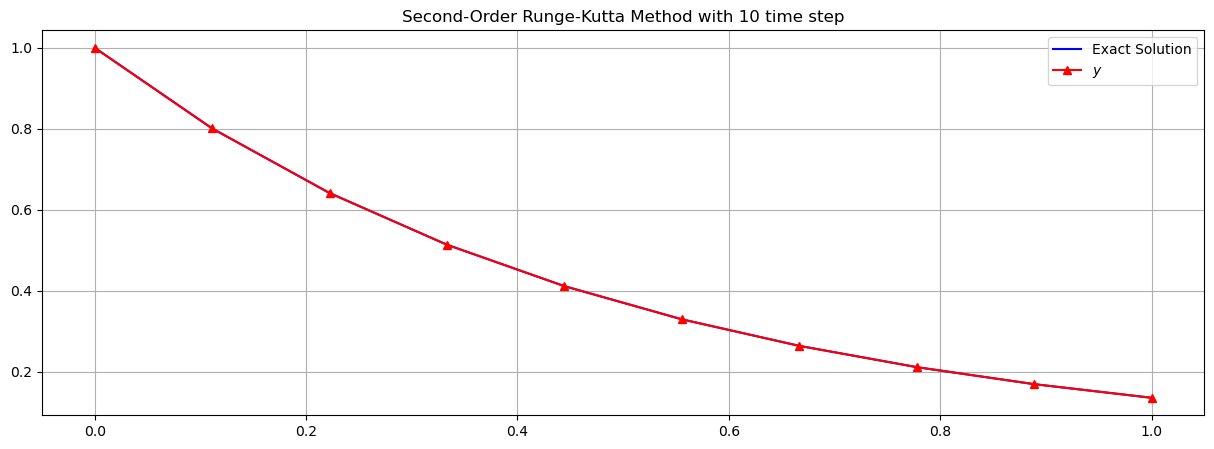

In [13]:
def exact_solution(t):
    return np.exp(-2*t)

t_values, y_values = ODESolver().RK4(func=lambda y, t: -2*y, y0=1, t0=0, t_end=1, n=10)

plt.figure(figsize=(15,5))
plt.plot(t_values, exact_solution(t_values), c='b', label='Exact Solution')
plt.plot(t_values, y_values, marker='^', c='r', label=r'$y$')
plt.title('Second-Order Runge-Kutta Method with 10 time step')
plt.legend()
plt.grid()
plt.show()

In [14]:
print('Analytical Solution:', exact_solution(t_values[-1]), 'Numerical Solution by RK4:', y_values[-1])

Analytical Solution: 0.1353352832366127 Numerical Solution by RK4: 0.13534190622874287


### 교재 예제 $III-I-9$

ODE:
$$
\frac{d^2y}{dt^2} + 2 \frac{dy}{dt}-3y=0,\quad y(0)=1, \frac{dy(0)}{dt}=0,\ (0\le t\le2)
$$


Exact Solution:

$$
y_{exact}(t)=\frac{3}{4}e^t + \frac{1}{4}e^{-3t},\quad y_{exact}(2)=5.542412
$$

Substitution:
$$
\frac{dy}{dt}\equiv z, \quad z(0)=0
$$

$$
\frac{d^2y}{dt^2}=\frac{dz}{dt}=-2z+3y = f(y, z, t),\quad z(0)=0, y(0)=1
$$

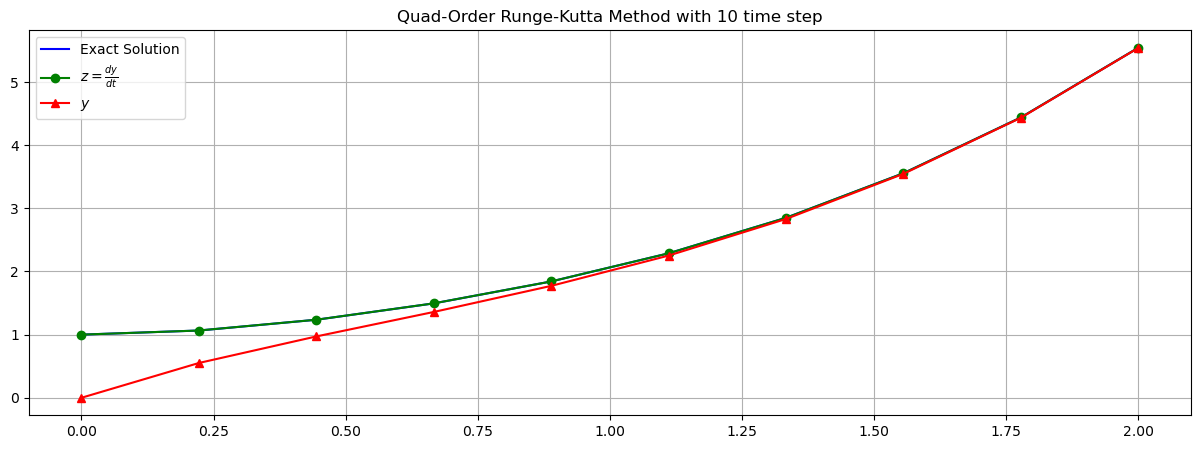

In [15]:
t_values, z_values, y_values = ODESolver().RK4_2nd(dfz=lambda y, z, t: -2*z + 3*y, 
                                       dfy=lambda y, z, t: z, 
                                       y0=1, z0=0, t0=0, t_end=2, n=10)

def exact_solution(t):
    return 3/4 * np.exp(t) + 1/4 * np.exp(-3*t)

plt.figure(figsize=(15,5))
plt.plot(t_values, exact_solution(t_values), c='b', label='Exact Solution')
plt.plot(t_values, z_values, marker='o', c='g', label=r'$z=\frac{dy}{dt}$')
plt.plot(t_values, y_values, marker='^', c='r', label=r'$y$')
plt.title('Quad-Order Runge-Kutta Method with 10 time step')
plt.legend()
plt.grid()
plt.show()

In [16]:
print('Analytical Solution:', exact_solution(t_values[-1]), 'Numerical Solution by RK4:', y_values[-1])

Analytical Solution: 5.542411762242154 Numerical Solution by RK4: 5.539713369190485


In [17]:
for itr in range(10, 1500, 100):
    t_values, z_values, y_values = ODESolver().RK4_2nd(dfz=lambda y, z, t: -2*z + 3*y, 
                                        dfy=lambda y, z, t: z, 
                                        y0=1, z0=0, t0=0, t_end=2, n=itr)

    print(f'# iteration: {itr}, Error:{exact_solution(t_values[-1]) - y_values[-1]}')

# iteration: 10, Error:0.002698393051669079
# iteration: 110, Error:0.0024787633805356535
# iteration: 210, Error:0.0024787530096999078
# iteration: 310, Error:0.002478752351322555
# iteration: 410, Error:0.0024787522336184864
# iteration: 510, Error:0.002478752200428147
# iteration: 610, Error:0.0024787521882734254
# iteration: 710, Error:0.002478752182984323
# iteration: 810, Error:0.0024787521803890655
# iteration: 910, Error:0.0024787521790150535
# iteration: 1010, Error:0.0024787521782094757
# iteration: 1110, Error:0.002478752177723642
# iteration: 1210, Error:0.0024787521774065624
# iteration: 1310, Error:0.002478752177196064
# iteration: 1410, Error:0.002478752177065502


### Kreyszig p67 예제

_Kreyszig Advanced Engineering Mathematics p.67_

스프링의 장력 $k$, 스프링에 매달린 무게추의 무게 $m$, 바닥 판 $c$
$$
m\frac{d^2y}{dt^2} + c\frac{dy}{dt} + ky =0 = \frac{d^2y}{dt^2}+\frac{c}{m}\frac{dy}{dt}+\frac{k}{m}y=0, \quad y(0)=0.16, \frac{dy}{dt}=0
$$

문제의 조건:

$$
m=10\text{kg}, c = \begin{cases}
c_1 = 100\text{kg/sec}\\
c_2 = 60\text{kg/sec}\\
c_3 = 10\text{kg/sec}
\end{cases}
,k=90\text{kg/sec}
$$


해석해:

$$
\begin{cases}
y_{exact}(t) = -0.02e^{9t} + 0.18e^{-t}, \text{ if } c_1 = 100\text{kg/sec}\\
y_{exact}(t) = (0.16 + 0.48t)e^{-3t},\text{ if }c_2 = 60\text{kg/sec}\\
y_{exact}(t) = e^{-0.5t}(0.16\cos{2.965t} + 0.027 \sin{2.965t}), \text{ if }c_3 = 10\text{kg/sec}
\end{cases}
$$

이것 또한 치환으로 풀이한다.

$$
\frac{dy}{dt}=z=f_1, \quad y(0)=0.16
$$

$$
\frac{d^2y}{dt^2}=\frac{dz}{dt}=-\frac{c}{m}z -\frac{k}{m}y = f_2 ,\quad z(0)=0
$$

조건: 
$$
(0\le t \le 10)
$$

#### $\text{I.}\quad C=100,\ \Delta t=0.1$

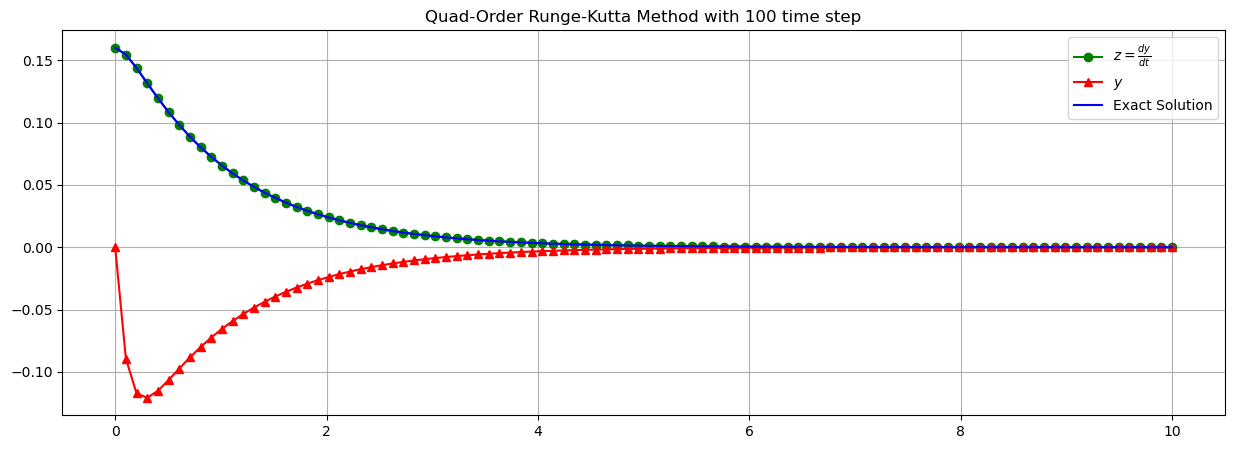

Analytical Solution: 0.000008171987 Numerical Solution by RK4: -0.000008172064


In [18]:
m=10;k=90;c=100

t_values, z_values, y_values = ODESolver().RK4_2nd(dfz=lambda y, z, t: -(c/m)*z - (k/m)*y, 
                                       dfy=lambda y, z, t: z, 
                                       y0=0.16, z0=0, t0=0, t_end=10, n=100)

def exact_solution(t):
    return -0.02 * np.exp(-9*t) + 0.18 * np.exp(-t)

plt.figure(figsize=(15,5))
plt.plot(t_values, z_values, marker='o', c='g', label=r'$z=\frac{dy}{dt}$')
plt.plot(t_values, y_values, marker='^', c='r', label=r'$y$')
plt.plot(t_values, exact_solution(t_values), c='b', label='Exact Solution')
plt.title('Quad-Order Runge-Kutta Method with 100 time step')
plt.legend()
plt.grid()
plt.show()
print(f'Analytical Solution: {exact_solution(t_values[-1]):.12f} Numerical Solution by RK4: {y_values[-1]:.12f}')

#### $\text{II.}\quad C=60,\ \Delta t=0.1$

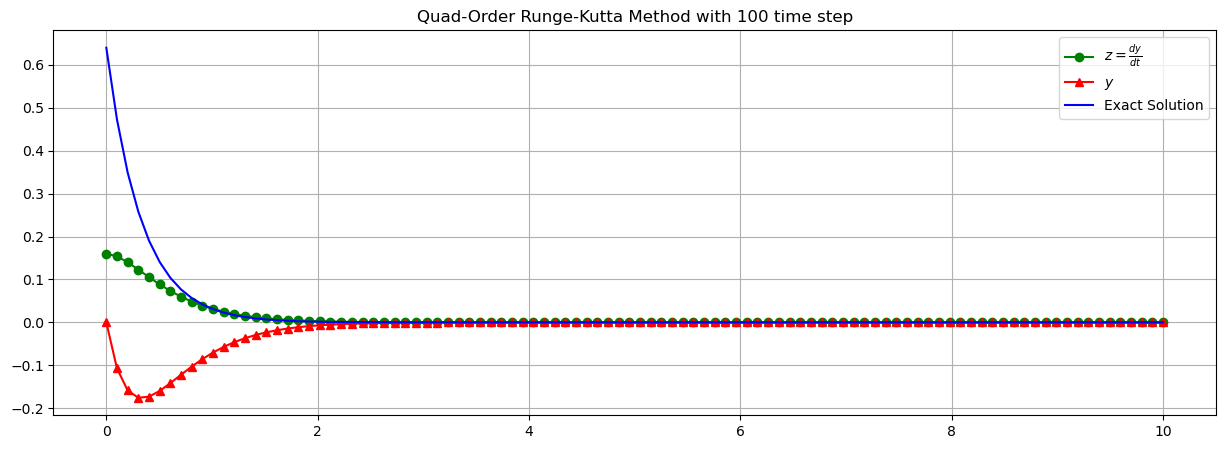

Analytical Solution: 0.000000000000 Numerical Solution by RK4: -0.000000000001


In [19]:
m=10;k=90;c=60

t_values, z_values, y_values = ODESolver().RK4_2nd(dfz=lambda y, z, t: -(c/m)*z - (k/m)*y, 
                                       dfy=lambda y, z, t: z, 
                                       y0=0.16, z0=0, t0=0, t_end=10, n=100)

def exact_solution(t):
    return (0.16 + 0.48)*np.exp(-3*t)

plt.figure(figsize=(15,5))
plt.plot(t_values, z_values, marker='o', c='g', label=r'$z=\frac{dy}{dt}$')
plt.plot(t_values, y_values, marker='^', c='r', label=r'$y$')
plt.plot(t_values, exact_solution(t_values), c='b', label='Exact Solution')
plt.title('Quad-Order Runge-Kutta Method with 100 time step')
plt.legend()
plt.grid()
plt.show()
print(f'Analytical Solution: {exact_solution(t_values[-1]):.12f} Numerical Solution by RK4: {y_values[-1]:.12f}')

#### $\text{III.}\quad C=10,\ \Delta t=0.1$

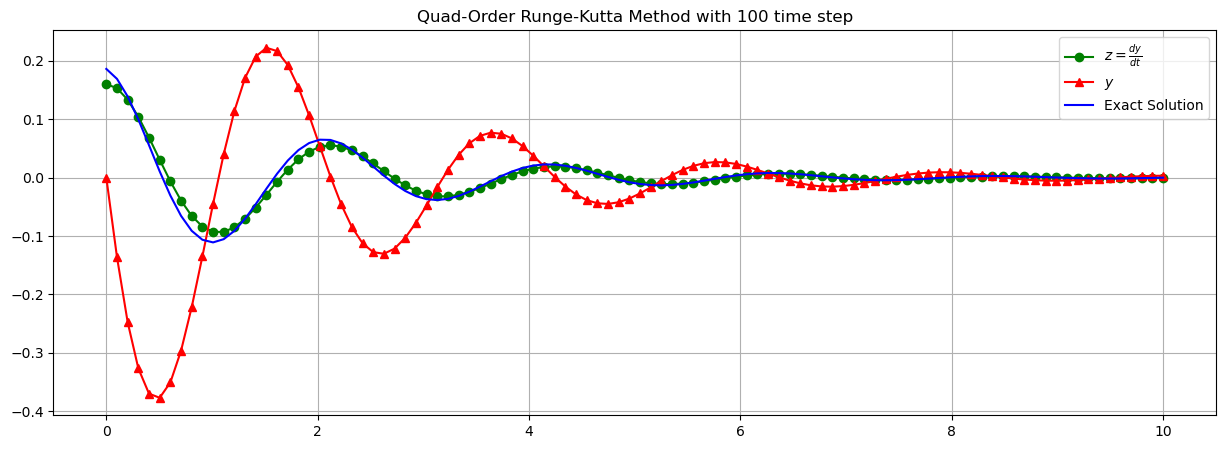

Analytical Solution: -0.000242999578 Numerical Solution by RK4: 0.003168106919


In [20]:
m=10;k=90;c=10

t_values, z_values, y_values = ODESolver().RK4_2nd(dfz=lambda y, z, t: -(c/m)*z - (k/m)*y, 
                                       dfy=lambda y, z, t: z, 
                                       y0=0.16, z0=0, t0=0, t_end=10, n=100)

def exact_solution(t):
    return np.exp(-0.5*t)*(0.16*np.cos(2.965*t) + 0.026*np.cos(2.965*t))

plt.figure(figsize=(15,5))
plt.plot(t_values, z_values, marker='o', c='g', label=r'$z=\frac{dy}{dt}$')
plt.plot(t_values, y_values, marker='^', c='r', label=r'$y$')
plt.plot(t_values, exact_solution(t_values), c='b', label='Exact Solution')
plt.title('Quad-Order Runge-Kutta Method with 100 time step')
plt.legend()
plt.grid()
plt.show()
print(f'Analytical Solution: {exact_solution(t_values[-1]):.12f} Numerical Solution by RK4: {y_values[-1]:.12f}')

---

# 경계치 문제의 해법(BVP)

_Boundary Value Problem_

$$
\frac{d^2y}{dx^2} +ay = b\quad(0 \le x \le L)
$$

$$
y(0) = 0,\ y(L)=0
$$

양 끝의 경계치는 기지의 값으로 전제한다. 그리고 모르는 값은 그 사이의 값이다. 그래서 __경계치 문제(Boundary Value Problem, BVP)__ 라고 한다.

컴퓨터로 이 문제를 풀기 위해선 역시 구간을 잘라 격자를 만들어내야 한다. 격자가 만들어지면 유한차분법, 테일러 급수 전개 등의 방법을 사용할 수 있다. 

---

## Matrix 방법

중앙차분법으로 2계 미분항을 차분식으로 변형하고, $y$는 실제 데이터 값으로 대체한다.
$$
\frac{y_{j+1}-2y_j + y_{j-1}}{\Delta x^2}+ ay_j =b\tag{0}
$$

이를 간략히 하면, 다음과 같은 식이 얻어진다.

$$
y_{j+1} + (-2 + a(\Delta x)^2)y_j + y_{j-1}=b(\Delta x)^2\tag{1}
$$

그런데 실제 데이터 포인트들은 유한하므로, 수치해석에선 미분방정식의 그래프를 격자점으로 나눈 것으로 풀이한다.  
격자점의 개수는 관심영역 $(0\le x \le L)$에서 $n+2$ 개로 설정하고, 격자간격은 $\Delta x = \frac{L-0}{n+1}$로 설정한다.  
이렇게 유한차분에 필요한, $y_{j+1},y_j,y_{j-1}$에 대응되는 $x_{j+1}, x_j, x_{j-1}$도 준비된다.

(1)식에서:

$$
\begin{cases}
j=1,\ y_2 + (-2 a(\Delta x)^2)y_1 + y_0 = b(\Delta x)^2\\
j=2,\ y_3 + (-2 a(\Delta x)^2)y_2 + y_1 = b(\Delta x)^2\\
j=3,\ y_4 + (-2 a(\Delta x)^2)y_3 + y_2 = b(\Delta x)^2\\
\quad\quad\quad\quad\quad\quad\vdots\\
j=n,\ y_{n+1} + (-2 a(\Delta x)^2)y_{n} + y_{n-1} = b(\Delta x)^2
\end{cases}
$$

이는 미지수가 3개인, $n$개의 __선형 연립방정식__ 이다. 따라서 행렬로 구성하여 가우스 소거법, 가우스-조던 소거법, TDMA 등으로 풀이할 수 있다.

$$
\begin{bmatrix}
-2+a(\Delta x)^2 & 1 &\cdots&\cdots& \cdots & 0\\
1&-2+a(\Delta x)^2 & 1 &\cdots& \cdots & 0\\
0&1&-2+a(\Delta x)^2 & 1 & \cdots & 0\\
\vdots&\ddots&\ddots&\vdots&\vdots&1\\
0&\cdots&\cdots&\cdots&1&-2+a(\Delta x)^2 
\end{bmatrix}

\begin{bmatrix}
y_0\\y_1\\ \vdots\\ \vdots \\ y_n
\end{bmatrix}
=
\begin{bmatrix}
b(\Delta x)^2 - y_0 \\ b(\Delta x)^2 \\\vdots\\
b(\Delta x)^2\\ b(\Delta x)^2 -y_n
\end{bmatrix}
$$

이렇게 삼대각행렬(Tri-diagonal matrix)가 나와서 TDMA로 효율적으로 미분방정식을 풀이할 수 있다.

### 예제

#### 교재 p.314 $II-I-I$ 문제

$$
\frac{d^2y}{dx^2} + 4y = 8,\quad y(0)=0,\ y(2)=0,\ (0\le x \le 2)
$$

구간 간격을 $\Delta x = 0.2$로 설정해 10개의 구간으로 나눈다.

해석해:

$$
y_{exact}(x) = 2 \left[\frac{\cos{4} -1}{\sin{4}} \times \sin{2x} - \cos{2x} + 1 \right]
$$

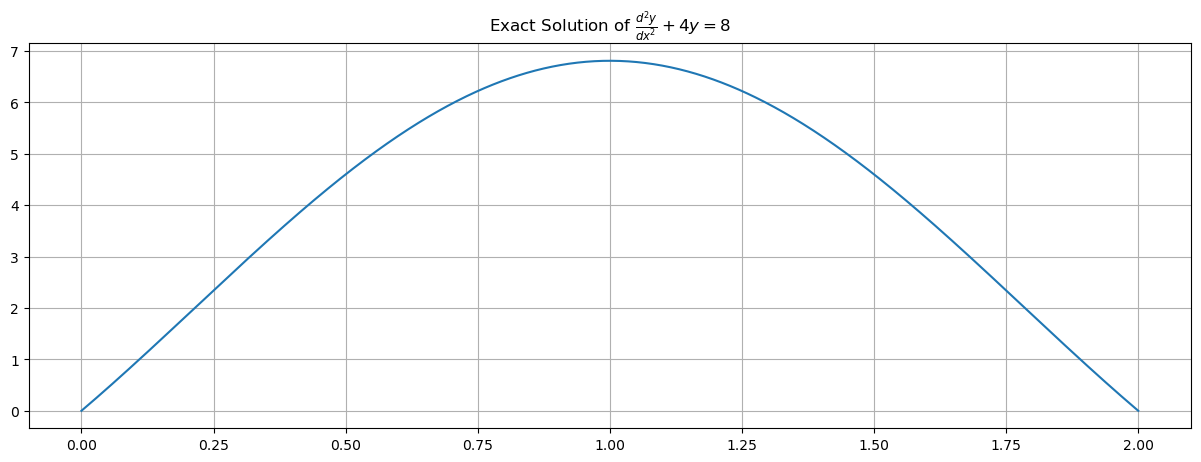

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def y_exact(x):
    return 2*((np.cos(4)-1)/np.sin(4) * np.sin(2*x)-np.cos(2*x)+1)

x = np.linspace(0, 2, 1000)

plt.figure(figsize=(15,5))
plt.plot(x, y_exact(x))
plt.title(r'Exact Solution of $\frac{d^2y}{dx^2} + 4y = 8$')
plt.grid()
plt.show()

반복식:

$$
y_{j+1} + (-2 + 4(\Delta x)^2)y_j + y_{j-1} = 8 (\Delta x)^2
$$

이걸로 행렬을 구성하면 $9\times 9$ 행렬이 나온다.

$$
\begin{bmatrix}
(-2 + 4(\Delta x)^2)&1&\cdots&\cdots&0\\
1&(-2 + 4(\Delta x)^2)&1&\cdots&0\\
\vdots&\ddots&&\vdots\\
0&\cdots&\cdots&1&(-2 + 4(\Delta x)^2)
\end{bmatrix}

\begin{bmatrix}
y_1\\y_2\\ \vdots\\ \vdots \\ y_9
\end{bmatrix}

=
\begin{bmatrix}
8(0.2)^2 -0\\8(0.2)^2\\ \vdots \\ \vdots \\8(0.2)^2 \\ 8(0.2)^2 -0
\end{bmatrix}

$$

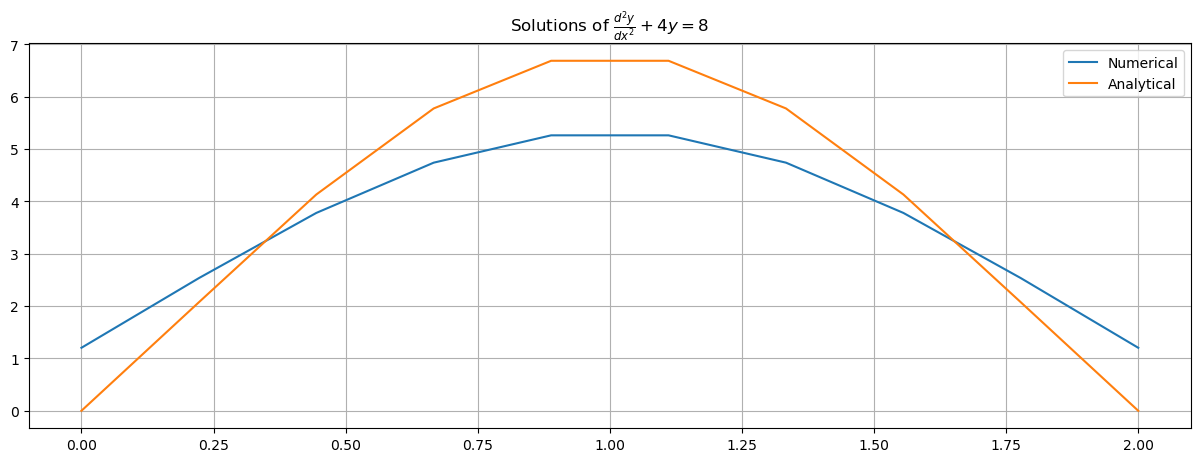

array([ 1.2037,  0.4616, -0.3519, -1.0359, -1.4246, -1.4246, -1.0359,
       -0.3519,  0.4616,  1.2037])

In [22]:
from ODE import ODESolver

n, logs, y = ODESolver().Matrix_Method(A_func=lambda delt: -2 + 4 * delt**2, 
                           b_func=lambda delt:8*(delt**2), 
                           delt=0.2, x0=0, x_end=2)

x = np.linspace(0, 2, n-1)

plt.figure(figsize=(15,5))
plt.plot(x, y, label='Numerical')
plt.plot(x, y_exact(x), label='Analytical')
plt.title(r'Solutions of $\frac{d^2y}{dx^2} + 4y = 8$')
plt.legend()
plt.grid()
plt.show()
(y - y_exact(np.linspace(0, 2, n-1))).round(4)

#### Chapra Prob 24-18

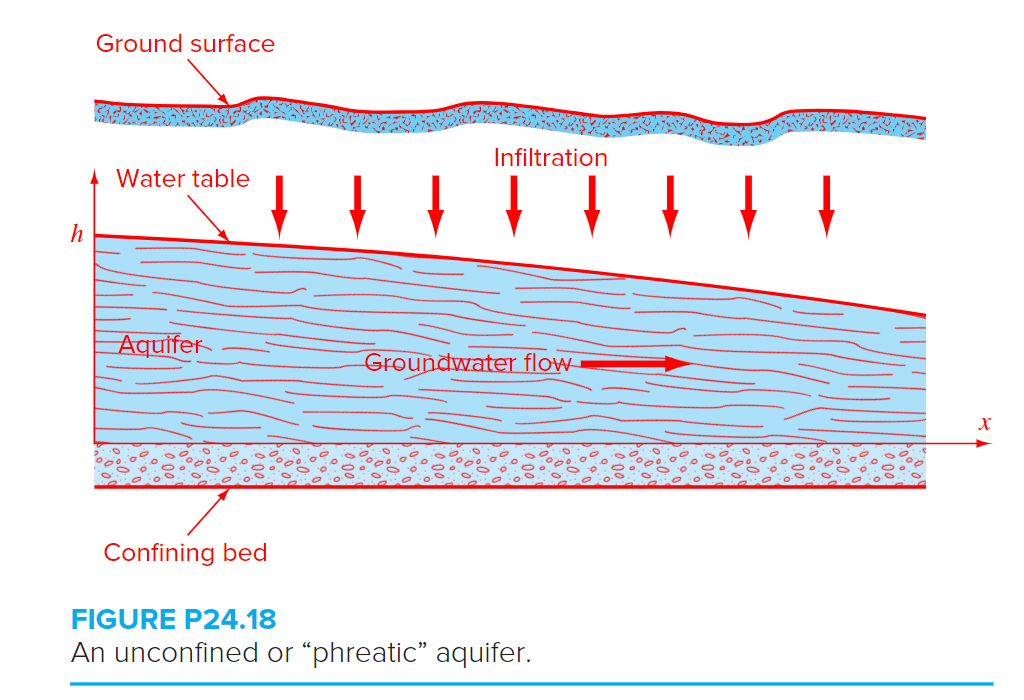

이러한 시스템을 아래와 같은 미분방정식으로 모형화하였다.

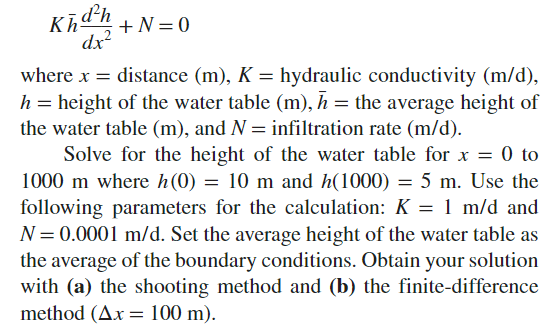

유한차분으로 반복식 구하기:

$$
\frac{d^2h}{dx^2} = - \frac{N}{K\bar{h}} = -\frac{0.0001}{1\times 7.5} -1.33\times 10^{-5} =B \tag{1}
$$

$$
\frac{h_{j+1}-2h_j + h_{j-1}}{\Delta x^2} = B
$$

최종 반복식:
$$
\to h_{j+1} - 2h_j + h_{j-1} = B(\Delta x^2)\tag{2}
$$

삼대각행렬의 원소는 아래의 반복이다.

$$
\begin{bmatrix}
1&-2&1
\end{bmatrix}
$$

In [23]:
h_0 = 10;h_1000 = 5;K = 1;N = 0.0001;delt = 0.1

n, logs, h = ODESolver().Matrix_Method(A_func=lambda delt: -2,
              b_func=lambda delt:-(0.0001/7.5)*(delt**2),
              delt=100, x0=0, x_end=1000)

print('\n'.join(logs))
h

Forward Elimination Step 1: b=[-2 -1 -2 -2 -2 -2 -2 -2 -2 -2], r=[-0.13333333 -0.2        -0.13333333 -0.13333333 -0.13333333 -0.13333333
 -0.13333333 -0.13333333 -0.13333333 -0.13333333]
Forward Elimination Step 2: b=[-2 -1 -1 -2 -2 -2 -2 -2 -2 -2], r=[-0.13333333 -0.2        -0.33333333 -0.13333333 -0.13333333 -0.13333333
 -0.13333333 -0.13333333 -0.13333333 -0.13333333]
Forward Elimination Step 3: b=[-2 -1 -1 -1 -2 -2 -2 -2 -2 -2], r=[-0.13333333 -0.2        -0.33333333 -0.46666667 -0.13333333 -0.13333333
 -0.13333333 -0.13333333 -0.13333333 -0.13333333]
Forward Elimination Step 4: b=[-2 -1 -1 -1 -1 -2 -2 -2 -2 -2], r=[-0.13333333 -0.2        -0.33333333 -0.46666667 -0.6        -0.13333333
 -0.13333333 -0.13333333 -0.13333333 -0.13333333]
Forward Elimination Step 5: b=[-2 -1 -1 -1 -1 -1 -2 -2 -2 -2], r=[-0.13333333 -0.2        -0.33333333 -0.46666667 -0.6        -0.73333333
 -0.13333333 -0.13333333 -0.13333333 -0.13333333]
Forward Elimination Step 6: b=[-2 -1 -1 -1 -1 -1 -1 -2 -2 -2

array([3.36666667, 6.6       , 6.4       , 6.06666667, 5.6       ,
       5.        , 4.26666667, 3.4       , 2.4       , 1.26666667])

## Shooting 방법

교재 320p, 1.3.2절

ODE 풀이법

1. IVP: Euler, Runge-Kutta

2. BVP: Matrix, Shooting

BVP의 형태:

$$
\frac{d^2y}{dx^2} +ay=b,\quad y(0)=y_0,\ y(L)=y_L,\ (0\le x \le L)\tag{0}
$$

$$
\frac{d^2y}{dx^2} +ay=b,\quad y(0)=y_0, \frac{dy(0)}{dx}=U_0
$$

Exact Solution이 $y_{L-B}$인데, RK4 방법으로 위 조건을 적용해 구해보았더니 $y_{L}$이 나왔다고 하자.

그런데

$$
\frac{dy(0)}{dx}=U_1
$$
으로 바꾸면 $y_{L-B}$에 더 가까워질 수도 있다.

이러한 오차를 아래와 같이 표현한다.

$$
y_L - y_{L-B}=Y(U)
$$

이런 차이는 $U$에 따라 변하므로, $Y$는 $U$의 함수이다.

오차를 최소화해야 하므로 $Y(U)=0$일 때의 $U$, 즉 경계값과 수치해가 일치하는 $\widetilde{U}$를 찾는 문제가 되며, 이는 근 찾기(Root Finding) 문제이다.
이렇게 구해진 값들은 정확해와 일치하게 될 것이다.

경계치 문제를 초기치 문제로 변환하되, 초기치 문제에서의 초기조건을 반복적인 근 찾기로 구해내는 알고리즘이다.

근 찾기:

$$
x^{(1)}-x^{(0)}=\delta^{(1)} = - \frac{f(x^{(0)})}{f'(x^{(0)})} \approx -\frac{f(x^{(0)})}{\frac{f(x^{(0)})-f(x^{(00)})}{x^{(0)}-x^{(00)}}}
$$

뉴턴-랩슨법은 미분이 어려울 수 있으니 할선법을 사용

$$
U^{(1)}-U^{(0)} = - \frac{Y(U^{(0)})}{\frac{Y(U^{(0)})-Y(U^{(00)})}{U^{(0)}-U^{(00)}}}
$$

### 예제

#### 오일러 방법으로 풀이

$$
\frac{d^2y}{dx^2} + 4y =8,\quad y(0)=0,\ y(2)=0,\ (0\le x\le 2)
$$

2계 상미분방정식이므로 먼저 치환한다.

$$
\frac{dy}{dx}=z=f_1,\quad y(0)=0
$$

$$
\frac{d^2y}{dx^2}=\frac{dz}{dx}=-4y+8=f_2
$$

$$
y(0)=0,\ \frac{dy(0)}{dx}=U_0
$$

$$
y_L - y_{LB} = Y(U), \text{ where }y_{LB}=0
$$

처음에는 $Y(U)$가 0이 아니다. 하지만 근 찾기 알고리즘을 돌리다 보면 결국 $\widetilde{U}$를 구하게 된다.

```C
U = 8.209541 
 
y[0.000000] = 0.000000 
y[0.200000] = 1.641908 
y[0.400000] = 3.603816 
y[0.600000] = 5.623019 
y[0.800000] = 7.385611 
y[1.000000] = 8.568520 
y[1.200000] = 8.889732 
y[1.400000] = 8.159980 
y[1.600000] = 6.327871 
y[1.800000] = 3.510165 
y[2.000000] = -0.000000 
```

In [24]:
from pandas import DataFrame

U, res = ODESolver().shooting_method(
    dfz=lambda y, z, t: 8 - 4 * y,
    dfy=lambda y, z, t: z,
    y0=0,
    yn=0,
    U0=9,
    U1=10,
    x0=0,
    xn=2,
    epsil=1e-6,
    n=1000,
    max_iter=1000,
    solver="Euler"
)
print('U=', U)
print('Logs:')
DataFrame(res, columns=['x','y'])

Converged after 1 iterations.
U= 8.698249418317728
Logs:


,x,y
0,0.000,0.000000e+00
1,0.002,1.741391e-02
2,0.004,3.485989e-02
3,0.006,5.233765e-02
4,0.008,6.984692e-02
...,...,...
995,1.990,7.064854e-02
996,1.992,5.293972e-02
997,1.994,3.526184e-02
998,1.996,1.761517e-02


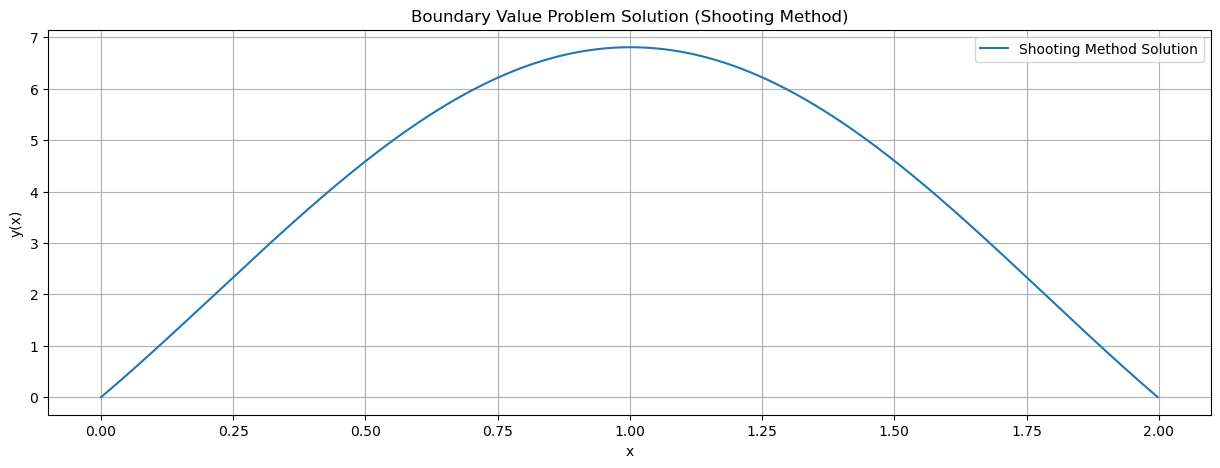

In [25]:
# Extract x and y values
x_vals, y_vals = zip(*res)

# Plot the solution
plt.figure(figsize=(15,5))
plt.plot(x_vals, y_vals, label="Shooting Method Solution")
plt.title("Boundary Value Problem Solution (Shooting Method)")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.grid()
plt.show()

#### Chapra Prob.24-18

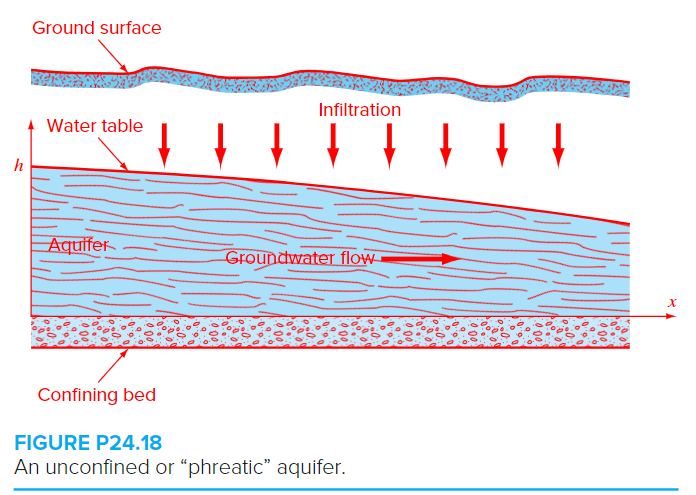

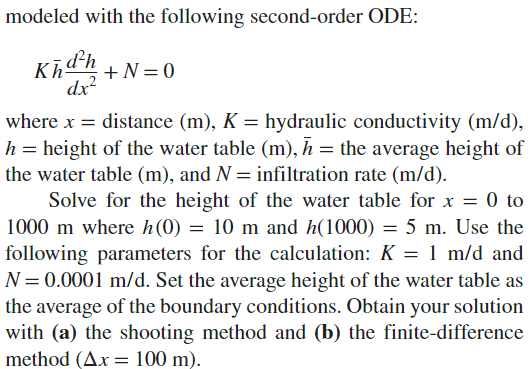

$$
k\bar{h}\frac{d^2h}{dx^2}+N=0,\quad h(0)=10, h(1000)=5
$$

$$
\frac{d^2h}{dx^2} = - \frac{N}{K\bar{h}} = -\frac{0.0001}{1\times 7.5} \tag{0}
$$

$$

\frac{dh}{dx}=z=f_1,\quad h(0)=10
$$

$$
\frac{d^2h}{dx^2}=\frac{dz}{dx}=-\frac{0.0001}{1\times 7.5}=f_2,\quad z(0)=U_0
$$

근을 구할 방정식은 아래와 같이 구해진다.

$$
h(1000)-h_B(1000) \equiv Y
$$

할선법:

$$
U^{(1)}-U^{(0)} =\delta^{(1)}= - \frac{Y(U^{(0)})}{\frac{Y(U^{(0)})-Y(U^{(00)})}{U^{(0)}-U^{(00)}}} 
$$

Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.
Converged after 1 iterations.


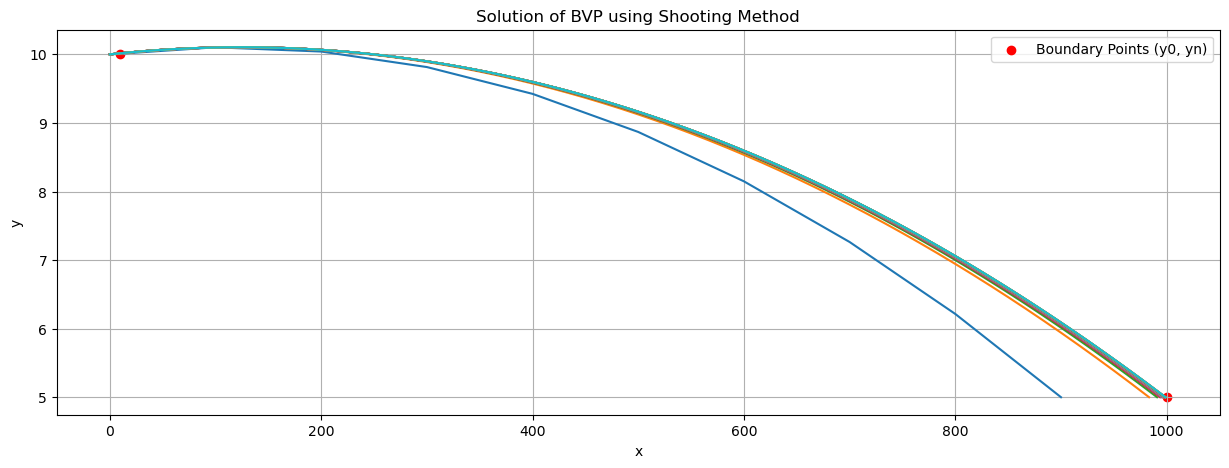

In [26]:
import matplotlib.pyplot as plt
from pandas import DataFrame
solver = ODESolver()

plt.figure(figsize=(15,5))
plt.scatter([10, 1000], [10, 5], color='red', label="Boundary Points (y0, yn)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution of BVP using Shooting Method")
plt.legend()
plt.grid(True)

for n in range(10, 1000, 50):
    U, results = solver.shooting_method(dfz=lambda y, z, x: -0.0001/7.5, dfy=lambda y,z,x: z,
                                        y0=10, yn=5, U0=9, U1=10, x0=0, xn=1000, n=n)
    # Plot the results
    x_values, y_values = zip(*results)
    plt.plot(x_values, y_values, label="Shooting Method Solution")

plt.show()

#### Legendre' Equation

$$
(1-x^2)\frac{d^2y}{dx^2} - 2x\frac{dy}{dx} + n(n+1)y=0
$$

#### Bessel's Equation

$$
x^2\frac{d^2y}{dx^2} + x\frac{dy}{dx} + (x^2-v^2)y=0
$$

이 방정식들을 푼 해들은 파동을 나타내는데, 점점 감쇠(Decay)한다. 이것들 또한 수치해석으로 풀이할 수 있다.

베셀 함수 풀이:

$$
\frac{d^2y}{dx^2} + \frac{1}{x}\frac{dy}{dx} + \frac{x^2 - v^2}{x^2}y=0
$$
여기서:
$$
\frac{x^2 - v^2}{x^2} = \left(1-\left( \frac{v}{x}\right)^2 \right)
$$

치환:

$$
\frac{dy}{dx} = z = f_1,\quad y(0)=A
$$

$$
\frac{dz}{dx}=- \frac{1}{x}z - \left(1-\left( \frac{v}{x}\right)^2 \right)y=f_2, \quad z(0)=B=\frac{dy(0)}{dx}
$$

$$
(0\le x \le 50)
$$

In [27]:
solver = ODESolver()

U, results = solver.shooting_method(dfz=lambda y, z, x:(-1/x)*z - (1- (1/x)**2)*y,
                       dfy=lambda y, z, x:z,
                       y0=1, U0=0.05, yn=0, U1=0.1,
                       x0=0.1, xn=50, n=100, solver='RK4')
print('U=',U)
print('Logs')

DataFrame(results)

Converged after 1 iterations.
U= -77.62096662663522
Logs


,0,1
0,0.100,1.000000e+00
1,0.599,1.289230e+01
2,1.098,8.746933e+00
3,1.597,6.010215e+00
4,2.096,3.259907e+00
...,...,...
95,47.505,-1.084415e+00
96,48.004,-1.192368e+00
97,48.503,-1.004585e+00
98,49.002,-5.705419e-01


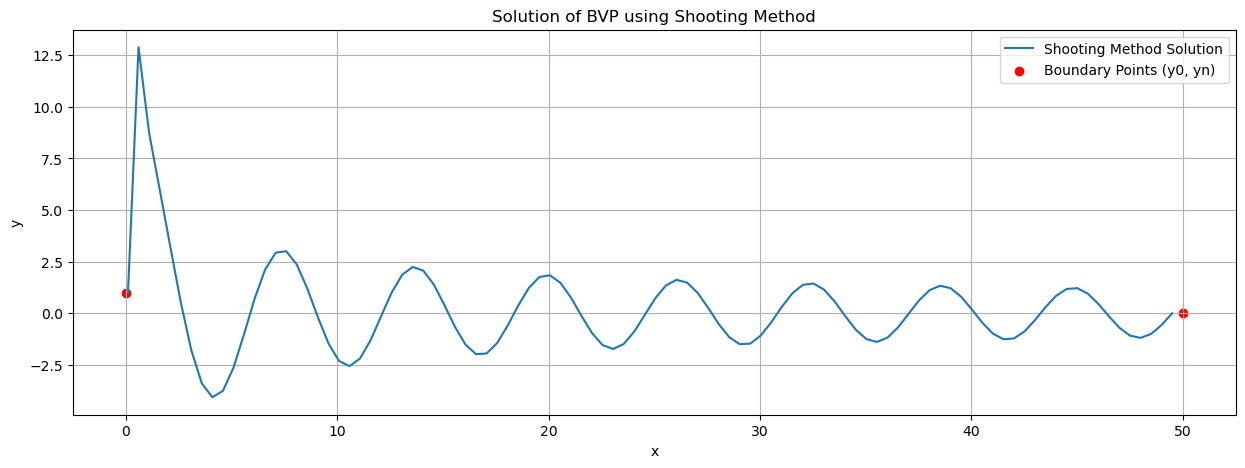

In [28]:
import matplotlib.pyplot as plt

# Plot the results
x_values, y_values = zip(*results)
plt.figure(figsize=(15,5))
plt.plot(x_values, y_values, label="Shooting Method Solution")
plt.scatter([0, 50], [1, 0], color='red', label="Boundary Points (y0, yn)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution of BVP using Shooting Method")
plt.legend()
plt.grid(True)
plt.show()